In [1]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import parallel_coordinates
import seaborn as sns
from sklearn import cross_validation
from sklearn.preprocessing import Imputer
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Look at the parameters
train.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [4]:
# Look at the parameter values
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [5]:
# Filter out obvious not required columns
train_sel = train.drop([u'PassengerId', u'Name', u'Ticket', u'Cabin'], axis = 1);
test_sel = test.drop([u'PassengerId', u'Name', u'Ticket', u'Cabin'], axis = 1);

In [6]:
train_sel.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S


In [7]:
train_sel.Sex = train_sel.Sex.astype("category")
train_sel.Embarked = train_sel.Embarked.astype("category")
train_sel.Pclass = train_sel.Pclass.astype("category")

test_sel.Sex = test_sel.Sex.astype("category")
test_sel.Embarked = test_sel.Embarked.astype("category")
test_sel.Pclass = test_sel.Pclass.astype("category")

In [8]:
train_sel.Sex = train_sel.Sex.cat.rename_categories(["1","2"])
train_sel.Embarked = train_sel.Embarked.cat.rename_categories(["1","2","3"])

test_sel.Sex = test_sel.Sex.cat.rename_categories(["1","2"])
test_sel.Embarked = test_sel.Embarked.cat.rename_categories(["1","2","3"])


In [9]:
train_sel.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,22,1,0,7.2500,3
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,3
3,1,1,1,35,1,0,53.1000,3
4,0,3,2,35,0,0,8.0500,3


In [10]:
train_sel.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


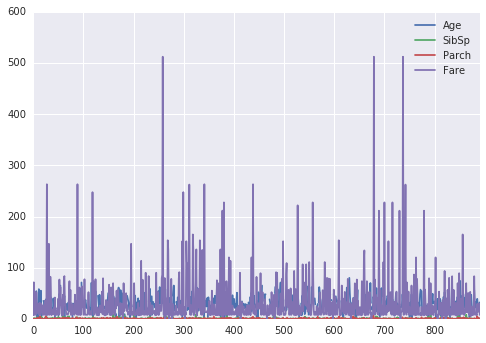

In [31]:
train_sel.drop("Survived", axis = 1).plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93e4343150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f93dfb4bc90>]], dtype=object)

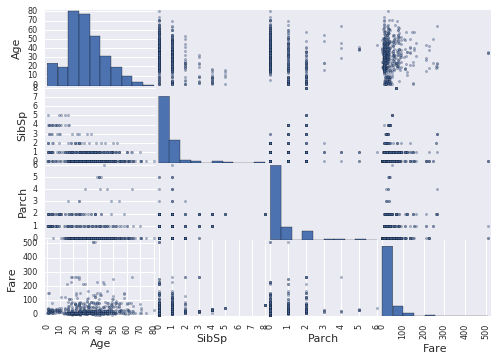

In [29]:
# This can help us to identify distributed and corelation
#scatter_matrix(train_sel.drop("Survived", axis=1), alpha=0.2, figsize=(6, 6), diagonal="kde")
scatter_matrix(train_sel.drop("Survived", axis=1), diagonal="hist")

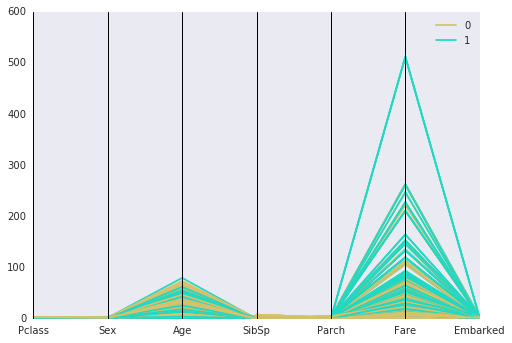

In [13]:
plt.figure()
parallel_coordinates(train_sel, 'Survived')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f93e4edccd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f93e4d51dd0>], dtype=object)

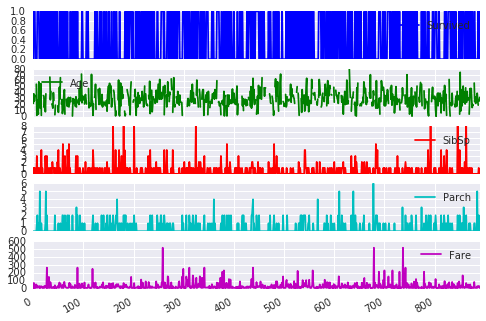

In [14]:
# Below 2 plots are plotted against index i.e. X axis is index of DataFrame
train_sel.plot.line(subplots = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f93e4d7a790>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f93e481af10>], dtype=object)

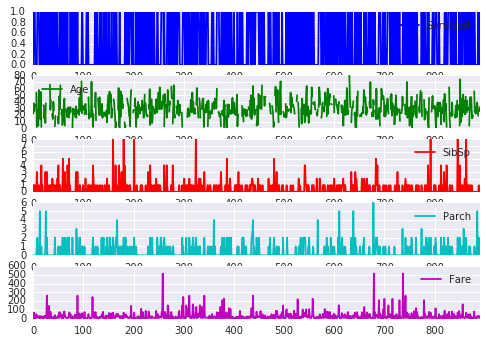

In [15]:
train_sel.plot.line(subplots = True, sharex=False)

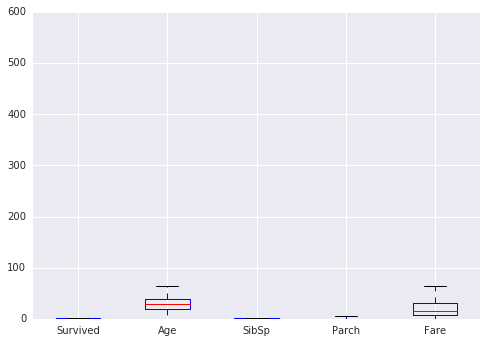

In [16]:
train_sel.plot.box()

In [17]:
# Preprocessing Data
train_sel.corr()

,Survived,Age,SibSp,Parch,Fare
Survived,1.000000,-0.077221,-0.035322,0.081629,0.257307
Age,-0.077221,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,0.096067,0.159651,0.216225,1.000000


In [18]:
train_sel.cov()

,Survived,Age,SibSp,Parch,Fare
Survived,0.236772,-0.551296,-0.018954,0.032017,6.221787
Age,-0.551296,211.019125,-4.163334,-2.344191,73.849030
SibSp,-0.018954,-4.163334,1.216043,0.368739,8.748734
Parch,0.032017,-2.344191,0.368739,0.649728,8.661052
Fare,6.221787,73.849030,8.748734,8.661052,2469.436846


In [19]:
# From above graphs we understand that the data is not skewed, 
# however, it's on different scales (Age, Fare) with some missing values.
# Since we will be using Tree/Forest, we don't need to scale the features.

imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
train_sel_pp = imp.fit_transform(train_sel.drop("Survived", axis = 1))
test_sel_pp = imp.transform(test_sel)
# Another way of filling missing values
# train_sel.Age = train_sel.Age.fillna( train_sel.Age.mean())
# train_sel.Embarked = train_sel.Embarked.fillna(train_sel.Embarked.median())

In [20]:
# As we can see, the data is more of a categorical data.
# Also, we are not able to observe any pattern's visually.
# Also, SibSp, Parch, Fare variables are skewed
# hence we will try random forest / decision tree

clf = tree.DecisionTreeClassifier()
scores_tree = cross_validation.cross_val_score(clf, 
                                          train_sel_pp,
                                          train_sel["Survived"], cv=10, 
                                          scoring='f1_weighted')
scores_tree 

array([ 0.73333333,  0.79744817,  0.77021909,  0.82112835,  0.81910599,
        0.82022472,  0.83915337,  0.73693597,  0.77641044,  0.83071154])

In [21]:
# We can observe a huge gap between the scores, hence in such cases we may require a Ensemble Method
# Random Forest

clfr = RandomForestClassifier(n_estimators=100)
scores_forest = cross_validation.cross_val_score(clfr, 
                                          train_sel_pp,
                                          train_sel["Survived"], cv=10, 
                                          scoring='f1_weighted')
scores_forest 


array([ 0.74507186,  0.80795243,  0.74470894,  0.85497084,  0.87673316,
        0.80711636,  0.80556137,  0.747241  ,  0.83265866,  0.85184793])

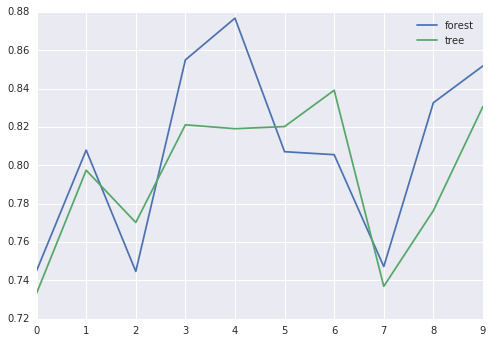

In [22]:
score_df = pd.DataFrame({"tree":scores_tree, "forest":scores_forest})
score_df.plot()

TypeError: inner() got multiple values for keyword argument 'ax'

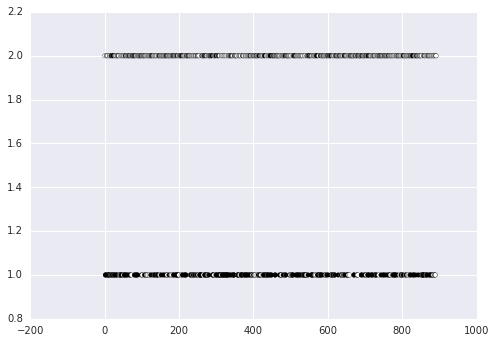

In [38]:
# As we can see Emsemble method's - RandomForest - is better that Decision tree. However, it's still not good enough.
# We will now draw an Contour plot to understand behaviour of our Classified Model

#clfr.fit(train_sel_pp, train_sel["Survived"])

ax = plt.scatter(train.PassengerId, train_sel_pp[:,1], c = train_sel.Survived)
plt.scatter(train.PassengerId, train_sel_pp[:,0], c = train_sel.Survived, ax = ax)

#plt.scatter(train.PassengerId, clfr.predict(train_sel_pp))



In [25]:
n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)


In [35]:
Y = pd.DataFrame(Y)

In [34]:
X = pd.DataFrame(X)

In [45]:
Z = pd.DataFrame({'predicted':clfr.predict(train_sel_pp), 'actual':train.Survived })

TypeError: Length of x must be number of columns in z.

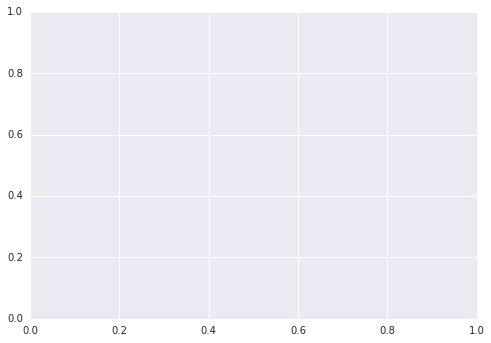

In [46]:
#clfr.fit(X, Y[0])
#plt.contourf(X, Y, clfr.predict(X), 8, alpha=.75, cmap='jet')
clfr.fit(train_sel_pp, train_sel["Survived"])
plt.contourf(train.PassengerId, train_sel.Fare, Z, 8, alpha=.75, cmap='jet')
